# Step 1: Data Import

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, roc_auc_score, precision_recall_curve

# Load the dataset
data = pd.read_csv('/Users/alinaelahie/BINF5507/ALINA/ASSIGNMENT2/Data/heart_disease_uci.csv')

# Display the first few rows to understand the structure of the dataset
data.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# Step 2: Data Exploration 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 107.9+ KB


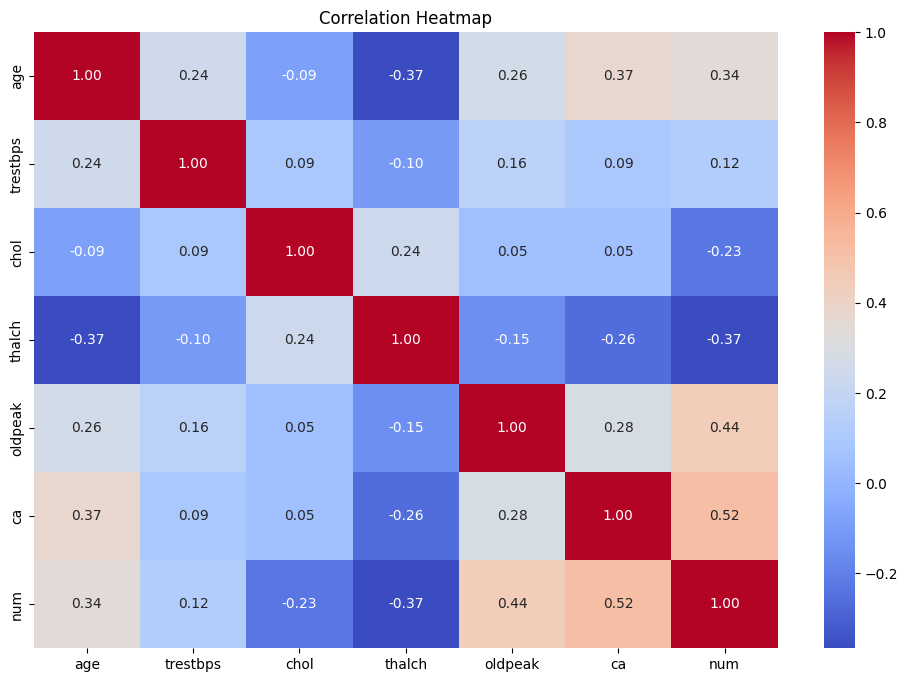

In [31]:
# Check for missing values and data types
data.info()

#Numeric Columns only
numeric_data = data.select_dtypes(include=['number'])

# Check basic statistics for numerical features
data.describe()

# Check for correlation between features
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


# Step 3: Build and Evaluate Model 

### Regression Models (ElasticNet)

Column Data Types:
 age           int64
sex          object
dataset      object
cp           object
trestbps    float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object
R^2: 0.0607
RMSE: 47.7802


/var/folders/tb/r4rjcs053l5bq6kr77m21qfw0000gn/T/ipykernel_13307/429434513.py:55: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  results = results.applymap(lambda x: x if isinstance(x, tuple) else (np.nan, np.nan))
/var/folders/tb/r4rjcs053l5bq6kr77m21qfw0000gn/T/ipykernel_13307/429434513.py:59: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sns.heatmap(results.applymap(lambda x: x[0]), annot=True, cmap='coolwarm', fmt=".4f")


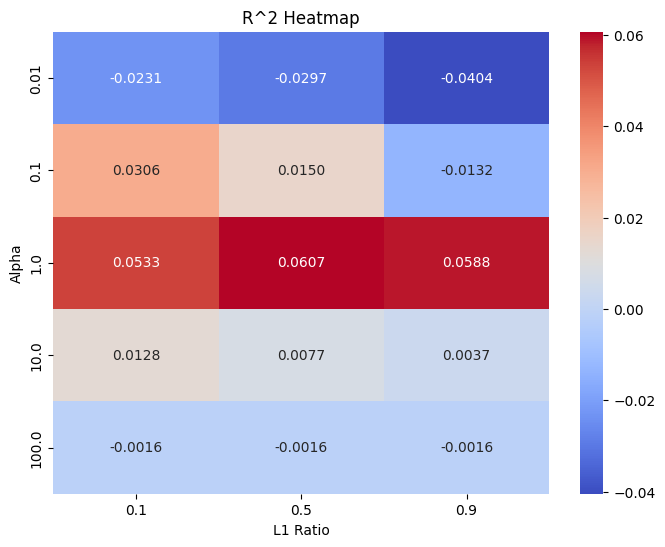

/var/folders/tb/r4rjcs053l5bq6kr77m21qfw0000gn/T/ipykernel_13307/429434513.py:67: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sns.heatmap(results.applymap(lambda x: x[1]), annot=True, cmap='coolwarm', fmt=".4f")


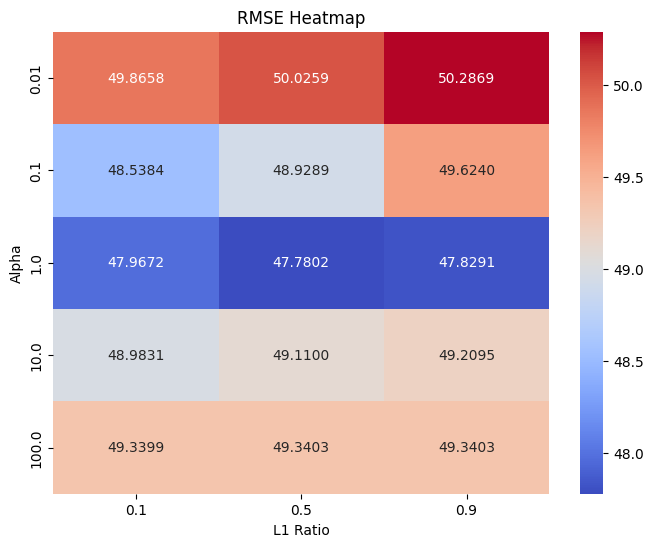

In [32]:

# Drop rows with missing values 
data = data.dropna()

# Define features (X) and target variable (y)
X = data.drop(columns=['chol'])  # Remove the target variable
y = data['chol']  # Target variable

# Print column data types to verify encoding
print("Column Data Types:\n", X.dtypes)

# Encode categorical columns using pd.get_dummies (One-hot encoding)
# Ensure all categorical columns are encoded into numeric features
categorical_cols = X.select_dtypes(exclude=['number']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Standardize numerical features
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the ElasticNet model
elasticnet = ElasticNet()
elasticnet.fit(X_train, y_train)

# Make predictions
y_pred = elasticnet.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R^2: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

# Hyperparameter Tuning (Alpha and l1_ratio)
alphas = [0.01, 0.1, 1, 10, 100]
l1_ratios = [0.1, 0.5, 0.9]

# Create a DataFrame to store results
results = pd.DataFrame(index=alphas, columns=l1_ratios)

for alpha in alphas:
    for l1_ratio in l1_ratios:
        elasticnet = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        elasticnet.fit(X_train, y_train)
        y_pred = elasticnet.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        results.loc[alpha, l1_ratio] = (r2, rmse)

# Convert results into a readable format
results = results.applymap(lambda x: x if isinstance(x, tuple) else (np.nan, np.nan))

# Display heatmap for R^2
plt.figure(figsize=(8, 6))
sns.heatmap(results.applymap(lambda x: x[0]), annot=True, cmap='coolwarm', fmt=".4f")
plt.title('R^2 Heatmap')
plt.xlabel("L1 Ratio")
plt.ylabel("Alpha")
plt.show()

# Display heatmap for RMSE
plt.figure(figsize=(8, 6))
sns.heatmap(results.applymap(lambda x: x[1]), annot=True, cmap='coolwarm', fmt=".4f")
plt.title('RMSE Heatmap')
plt.xlabel("L1 Ratio")
plt.ylabel("Alpha")
plt.show()



### Classification Models 

In [ ]:
#Split the data 
# Features (X) and target (y)
X = data.drop(columns=['chol', 'num'])  # Drop cholesterol column
y = data['num']  # Target variable for classification

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Logistic Regression 
# Initialize
logreg = LogisticRegression(max_iter=1000)

# Train the model
logreg.fit(X_train, y_train)

# Predictions
y_pred = logreg.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
precision, recall, _ = precision_recall_curve(y_test, y_pred)
auprc = auc(recall, precision)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUROC: {roc_auc:.4f}")
print(f"AUPRC: {auprc:.4f}")

#k-NN Classifier
# Initialize
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Predictions
y_pred_knn = knn.predict(X_test)

# Evaluation metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_pred_knn)
precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_pred_knn)
auprc_knn = auc(recall_knn, precision_knn)

print(f"k-NN Accuracy: {accuracy_knn:.4f}")
print(f"k-NN F1 Score: {f1_knn:.4f}")
print(f"k-NN AUROC: {roc_auc_knn:.4f}")
print(f"k-NN AUPRC: {auprc_knn:.4f}")

#Plot AUROC and AUPRC Curves
# AUROC and AUPRC plots for Logistic Regression
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(recall, precision, label='Logistic Regression')
plt.title('AUPRC for Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.title('AUROC for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

# AUROC and AUPRC plots for k-NN
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(recall_knn, precision_knn, label='k-NN')
plt.title('AUPRC for k-NN')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.subplot(1, 2, 2)
plt.plot(fpr_knn, tpr_knn, label='k-NN')
plt.title('AUROC for k-NN')
plt.xlabel


ValueError: could not convert string to float: 'Female'